## end of distribution imputation
1) we will apply this when we have a type missing data not at random here we will the nan value with the value that is present       beyond the 3rd standard deviation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Age','Survived','Fare'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


## capturing the nan values in a new feature using the 0s and 1s

In [3]:
df['capture_nan']=np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,capture_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


<Axes: ylabel='Frequency'>

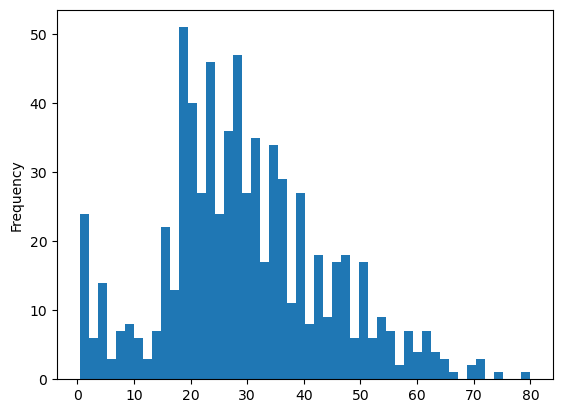

In [4]:
df.Age.plot.hist(bins=50)

<Axes: xlabel='Age'>

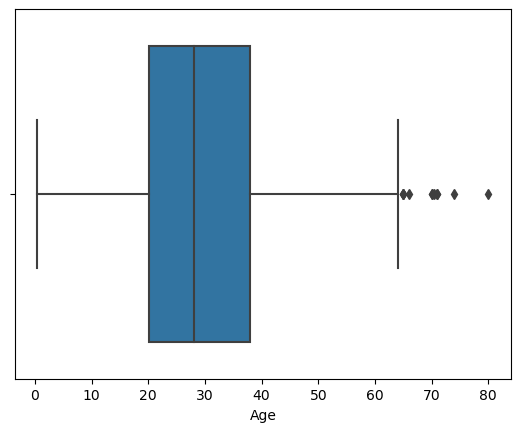

In [5]:
sns.boxplot(x='Age',data=df)

In [6]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [7]:
median=df.Age.median()
median

28.0

In [8]:
def dist(dataframe,feature,extreme,median):
    df[feature+"_distribution"]=df[feature].fillna(extreme)
    df[feature].fillna(median,inplace=True)

In [9]:
dist(df,'Age',extreme,median)
df.head(10)

,Survived,Age,Fare,capture_nan,Age_distribution
0,0,22.0,7.2500,0,22.00000
1,1,38.0,71.2833,0,38.00000
2,1,26.0,7.9250,0,26.00000
3,1,35.0,53.1000,0,35.00000
4,0,35.0,8.0500,0,35.00000
5,0,28.0,8.4583,1,73.27861
6,0,54.0,51.8625,0,54.00000
7,0,2.0,21.0750,0,2.00000
8,1,27.0,11.1333,0,27.00000
9,1,14.0,30.0708,0,14.00000


<Axes: ylabel='Frequency'>

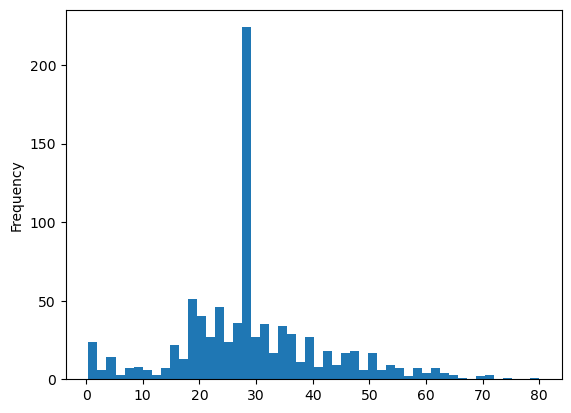

In [10]:
df.Age.plot.hist(bins=50)

<Axes: ylabel='Frequency'>

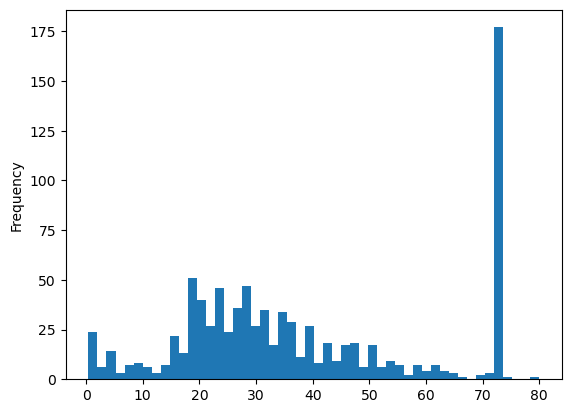

In [11]:
df.Age_distribution.plot.hist(bins=50)

## here we can see that all the outliers have been covered

<Axes: xlabel='Age_distribution'>

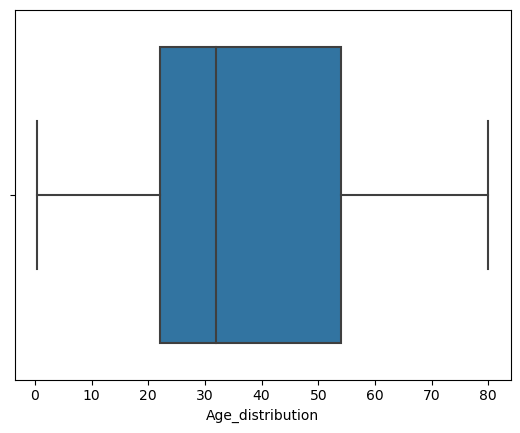

In [12]:
sns.boxplot(x='Age_distribution',data=df)

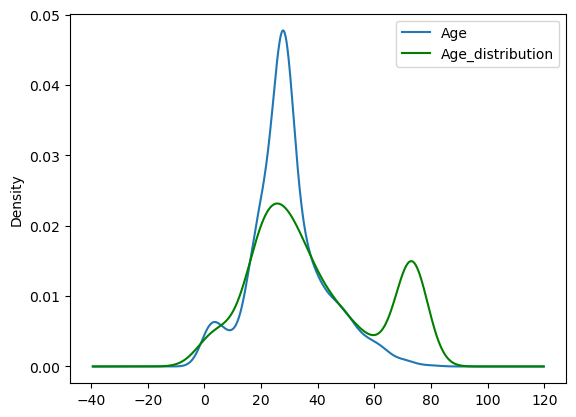

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
df.Age.plot(kind='kde',ax=ax)
df.Age_distribution.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## advantages:
1) easy to implement.
2) captures the importance of missingness if there is one.

## disadvantages:
1) too much distortion in the original variance